# HW3-Relaxation method in BVP.

## 107022138
    
    

## Using numerical method to solve Laplace equation
## For 1 Dimension
<font size = 4 >
    $$
    V_i = \frac{1}{2}(V_{i+1} + V_{i-1})
    $$
    
    
</font> 

## For 2 Dimension
<font size = 4 >
    $$
    V_{i,j} = \frac{1}{4}(V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1})
    $$
    <br>
</font>
    

<font size = 4>
    In 1-Dimesion case, I use the vector repretation of potential V:<br>
    $$
    V^{k+1} = V^k \cdot A
    $$
    where k is the iteration number, A is:
    $$
    A = \left[
    \begin{matrix}
    0 & \frac{1}{2} & 0 & \cdots & 0 \\
    \frac{1}{2} & 0 & \frac{1}{2} & \cdots & 0 \\
    0 &  \frac{1}{2} & 0 &  \ddots & \vdots   \\
    \vdots & \vdots & \ddots & \ddots & \frac{1}{2} \\
    0 & 0 & \cdots & \frac{1}{2} & 0 \\
    \end{matrix}
    \right]
    $$

Text(0, 0.5, 'V')

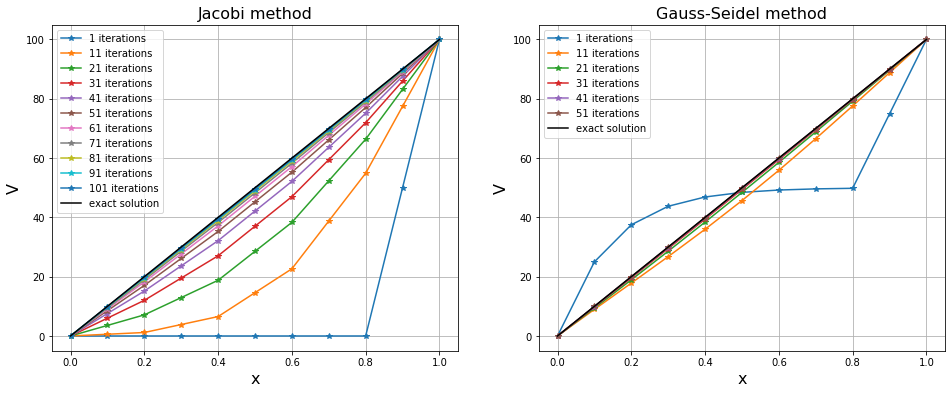

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()

N = 11     # N means the number of equl points
x = np.linspace(0,1,N)
V = np.zeros(N)*50   # initial condition for Jacobi method
V[N-1] = 100
V[0] = 0

A = np.zeros([N,N])
A = np.eye(N, M=None, k=1)/2 + np.eye(N, M=None, k=-1)/2

for i in range(10*N):
    V = np.dot(V,A)
    V[N-1] = 100
    V[0] = 0
    if (i%10 == 0):
        ax[0].plot(x,V,'*-',label = str(i+1) + ' iterations' )
ax[0].plot([0,1],[0,100],'k-',label = 'exact solution')

for k in range (6):
    V = np.ones(len(x))*50
    V[len(x)-1] = 100
    V[0] = 0
    for j in range(10*k+1):
        for i in range(len(x)):
            if (i != 0 and i != len(x)-1):
                V[i] = (V[i-1] + V[i+1])/2
    ax[1].plot(x,V,'*-',label = str(10*k+1) + ' iterations')
ax[1].plot([0,1],[0,100],'k-',label = 'exact solution')

ax[1].legend()
ax[1].grid()
ax[0].legend()
ax[0].grid()

ax[0].set_title('Jacobi method',fontsize = 16)
ax[1].set_title('Gauss-Seidel method',fontsize = 16)
ax[0].set_xlabel('x',fontsize = 16)
ax[1].set_xlabel('x',fontsize = 16)
ax[0].set_ylabel('V',fontsize = 16)
ax[1].set_ylabel('V',fontsize = 16)

## Tasks: Contour plots (equipotentials) and electric field
<font size = 4>
    Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions.<br>
    > Allow the potentials on all four sides to be specified arbitrarily.<br>
    > The number of grid point can be changed.<br>
    > Use Jacobi method or Gauss-Seidel method.<br>
    > Use some good initial guess.<br>
    > Plot the equipotentials.<br>
    > Plot the electric fields.
</font>

(0, 1)

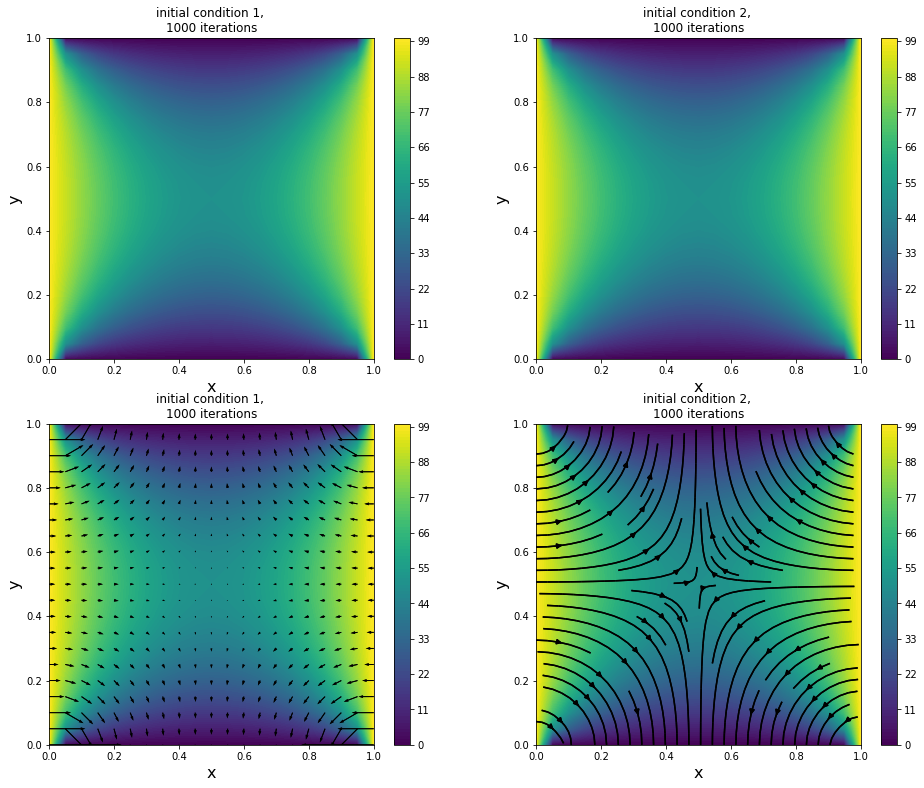

In [2]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,13))
ax = axes.flatten()
N = 21     # N means the number of equl points
it = 1000
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))

V[N-1,:] = 0
V[0,:] = 0
V[:,N-1] = 100
V[:,0] = 100

for k in range(4):
    if (k%2 == 1): #  another initial guess
        V[1:-1,1:-1] = np.random.random([N-2,N-2])*2
        
    for i in range(it):
        V[1:-1,1:-1] = 1/4*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2])
    
    contour = ax[k].contourf(X,Y,V,100)
    fig.colorbar(contour, shrink=1.0, aspect=20,ax=ax[k])
    
    ax[k].set_title('initial condition ' + str(k%2 +1) + ', \n' + str(it) + ' iterations')
    ax[k].set_xlabel('x', fontsize = 16)
    ax[k].set_ylabel('y', fontsize = 16)
    if(k > 1):
        Ex, Ey = np.gradient(-V)
        ax[2].quiver(X,Y,Ey,Ex)
        ax[3].streamplot(x,y,Ey,Ex,density = 1,color = 'k')
ax[3].set_ylim([0,1])

## Solve Poission's equation
<font size = 4>
    <br>
    In 2D case, the Poission's equation has the iteration relation:<br>
    $$
    V_{i,j} = \frac{1}{4}(V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1}) + \pi \rho_{i,j}h^2
    $$
    <br>
    where $\rho$ is the charge density, $h$ is discrete length.

## Single charge
<font size = 4>
    <br>
    The method to solve Poission's equation is almost the same except adding one source term in every iterations.<br><br>
    The following code will check if the potential falls logarithmically, as we can expect this result in a 2-D plane being cut from a infinity long wire.

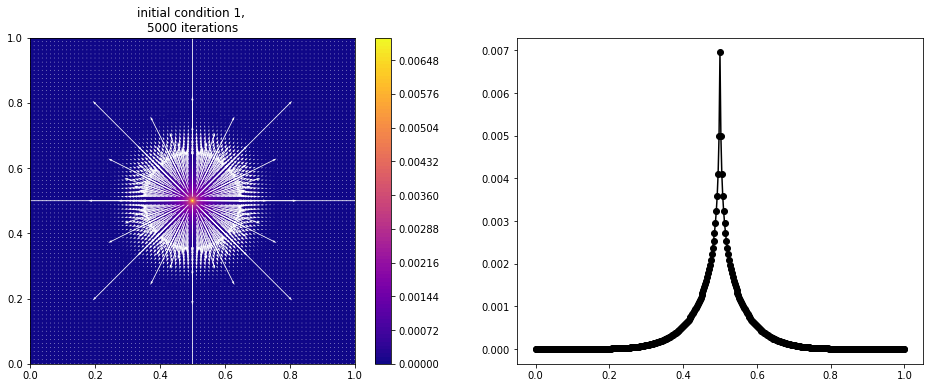

In [50]:
fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()
N = 401     # N means the number of equl points
it = 5000
nskip = 5
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))

ρ = np.zeros((N,N))
ρ[int((N-1)/2),int((N-1)/2)] = 100
h = (x[N-1]-x[0])/(N-1)
ρρ = np.pi*h**2*ρ
w = 0

s = np.zeros_like(x)
        
for i in range(it):
    V[1:-1,1:-1] = (1+w)/4*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2]) + ρρ[1:-1,1:-1] - w*V[1:-1,1:-1]

s = V[int((N-1)/2),:]
ax[1].plot(x,s,'ko-')

contour = ax[0].contourf(X,Y,V,100,cmap='plasma')
fig.colorbar(contour, shrink=1.0, aspect=20,ax=ax[0])
ax[0].set_title('initial condition ' + str(k%2 +1) + ', \n' + str(it) + ' iterations')

Ex, Ey = np.gradient(-V)
skip=(slice(None,None,nskip),slice(None,None,nskip))
ax[0].quiver(X[skip],Y[skip],Ey[skip],Ex[skip],color = 'w')
# ax[0].streamplot(x,y,Ex,Ey,density = 1,color = 'k')

Vf = s[int((N-1)/2):]

V = -0.01941ln(r) -0.01338


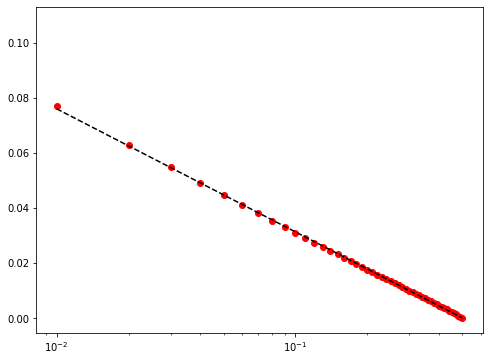

In [4]:
xf = x[int((N-1)/2):]-x[int((N-1)/2)]

plt.figure(figsize = (8,6))
plt.plot(xf,Vf,'ro')
plt.xscale('log')

fit = np.polyfit(np.log(xf[1:]), Vf[1:], 1)
print('V = ' + str('%.5f' %fit[0]) + 'ln(r) ' + str('%.5f' %fit[1]))

xp = np.linspace((xf[1]),(xf[-1]))
Vp = fit[0]*np.log(xp) + fit[1]
plt.plot(xp,Vp,'k--')

## Dipole
<font size =4>
    For a electric dipole, the potential can be express as:
    $$
    V_{dip} = \frac{1}{4\pi \epsilon_0} \frac{\pmb{p} \cdot \pmb{\hat r} }{r^2}
    $$
    <br>
    where $\pmb{p}$ is the dipole moment, $\pmb{r}$ is observer's position.
    <br>
    Put the dipole in the original point in Cartesian coordinate, dipole moment points along y direction,<br>
    one can obtain:
    $$
    V_{dip} = \frac{Cy}{x^2 + y^2}
    $$
    $C$ is a constant.<br>
    I will cut some parallel slices, and use the above relation to fit the slices data.

Text(0.5, 1.0, '$x_0 = $20$\\times h$')

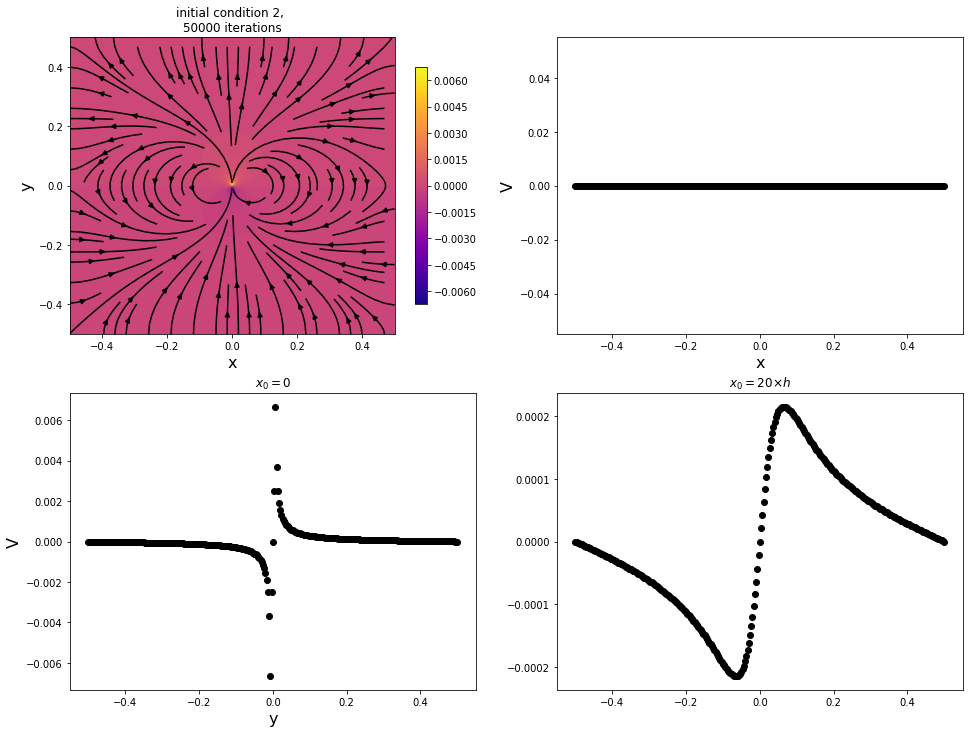

In [5]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 301     # N means the number of equl points
it = 50000
n = 2       # distance between two charges 
nskip = 10
x = np.linspace(-0.5,0.5,N)
y = np.linspace(-0.5,0.5,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
ρ = np.zeros((N,N))
ρ[int((N-1)/2)+n , int((N-1)/2)] = 100
ρ[int((N-1)/2)-n , int((N-1)/2)] = -100
h = (x[N-1]-x[0])/(N-1)
ρρ = np.pi*ρ*h**2
sx = np.zeros_like(x)
sy = np.zeros_like(y)
n1 = 20        # distance between fitting slice and the y-axis
n3 = 80
w = 0

for i in range(it):
    V[1:-1,1:-1] = 1/4*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2]) + ρρ[1:-1,1:-1]
    V[1:-1,0] = 1/4*(V[0:-2,0] + V[2:,0] + V[1:-1,1])
    V[0,1:-1] = 1/4*(V[0,0:-2] + V[0,2:] + V[0,1:-1])
    V[1:-1,-1] = V[1:-1,0]
    V[-1,1:-1] =-V[0,1:-1]

sy = V[: , int((N-1)/2)]
sx = V[int((N-1)/2) , :]
sy1 = V[: , int((N-1)/2)+n1]
sx1 = V[int((N-1)/2)+n3 , :]
ax[1].plot(x,sx,'ko')
ax[2].plot(y,sy,'ko')
ax[3].plot(y,sy1,'ko')
# ax[3].plot(x,sx1,'ko')

contour = ax[0].contourf(X,Y,V,100,cmap = 'plasma')
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[0])
ax[0].set_title('initial condition ' + str(k%2 +1) + ', \n' + str(it) + ' iterations')

Ey, Ex = np.gradient(-V)
skip=(slice(None,None,nskip),slice(None,None,nskip))
# ax[0].quiver(X[skip],Y[skip],Ex[skip],Ey[skip],color = 'k')
ax[0].streamplot(x,y,Ex,Ey,density = 1,color = 'k')


ax[0].set_xlabel('x',fontsize = 16)
ax[0].set_ylabel('y',fontsize = 16)
ax[1].set_xlabel('x',fontsize = 16)
ax[1].set_ylabel('V',fontsize = 16)
ax[2].set_xlabel('y',fontsize = 16)
ax[2].set_ylabel('V',fontsize = 16)
ax[2].set_xlabel('y',fontsize = 16)
ax[2].set_ylabel('V',fontsize = 16)
ax[2].set_title(r'$x_0 = 0$')
ax[3].set_title(r'$x_0 = $' + str(int(n1)) + r'$\times h$')

21.4159651610192 29.076873874785704 0.0007008208340418577
4.665411544717921 2.984036547041346 6.696143972802711e-05


Text(0, 0.5, 'v')

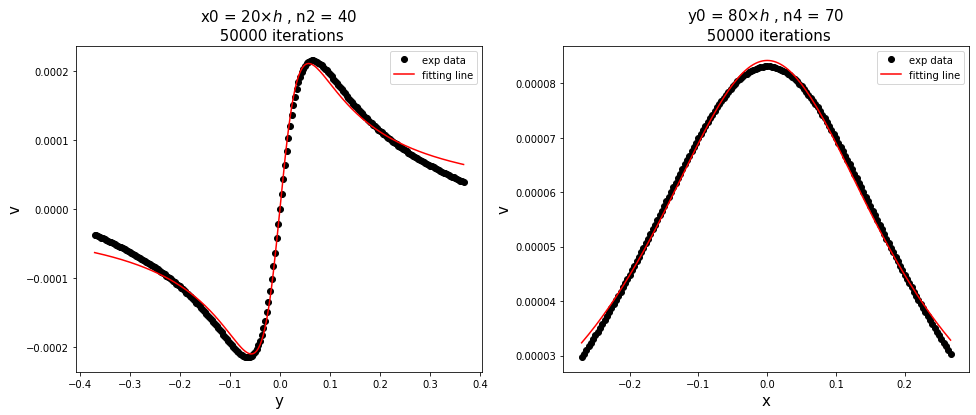

In [6]:
from scipy.optimize import curve_fit
fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()
x0 = h*n1
y0 = h*n3
n2 = 40     # fitting region in x = x0 = n1*h , y = [-(N/2 - n2)*h, (N/2 - n2)*h]
n4 = 70
def func(y,a,b,c):
    return((c*y)/((a*x0**2+b*y**2)))
def func2(x,a,b,c):
    return((c*y0)/((a*x**2+b*y0**2)))

popt,pcov = curve_fit(func,y[n2-1:-n2],sy1[n2-1:-n2])
# popt, pcov = curve_fit(func, y[n2-1:-n2], sy1[n2-1:-n2], bounds = ([0.99,0.99,0],[1.1,1.1,10]))
a = popt[0]
b = popt[1]
c = popt[2]
print(a,b,c)
Vfit = func(y[n2-1:-n2],a,b,c)

popt,pcov = curve_fit(func2,x[n4-1:-n4],sx1[n4-1:-n4])
# popt, pcov = curve_fit(func, y[n4-1:-n4], sy1[n4-1:-n4], bounds = ([0.99,0.99,0],[1.1,1.1,0.01]))
a2 = popt[0]
b2 = popt[1]
c2 = popt[2]
print(a2,b2,c2)
Vfit2 = func2(x[n4-1:-n4],a2,b2,c2)


ax[0].plot(y[n2-1:-n2],sy1[n2-1:-n2],'ko',label = 'exp data')
ax[0].plot(y[n2-1:-n2],Vfit,'r',label = 'fitting line')
ax[0].legend()
ax[0].set_title('x0 = ' + str(int(n1)) + r'$\times h$' + ' , n2 = ' + str(int(n2)) + '\n ' + str(int(it)) + ' iterations', fontsize = 15)
ax[0].set_xlabel('y',fontsize = 15)
ax[0].set_ylabel('v',fontsize = 15)

ax[1].plot(x[n4-1:-n4],sx1[n4-1:-n4],'ko',label = 'exp data')
ax[1].plot(x[n4-1:-n4],Vfit2,'r',label = 'fitting line')
ax[1].legend()
ax[1].set_title('y0 = ' + str(int(n3)) + r'$\times h$' + ' , n4 = ' + str(int(n4)) + '\n ' + str(int(it)) + ' iterations' , fontsize = 15)
ax[1].set_xlabel('x',fontsize = 15)
ax[1].set_ylabel('v',fontsize = 15)

<font size = 4>
    From above results, the fitting line and simulation data does not fit quite good when $x,y $ getting larger.<br>
    Even when iteration number is 500000, it still have no perfact fitting.
    There is one thing that should not happend, the fitting coefficient a and b should be the same according to the $V_{dip}$.<br>
    However, this case in fact is 2 infinity lone wire with uniform charge！<br>
    So the potential should be:<br>
    $$
    V = C \frac{ln(x^2 + (y-d/2)^2)}{ln(x^2 + (y+d/2)^2)}
    $$
    where C is some constant, d is the distanve between 2 wire.

9.76370076473673e-08 -0.002112124642060215
-2.2048727285226376e-05 -0.002097976278423623


-2.341076715711466e-13

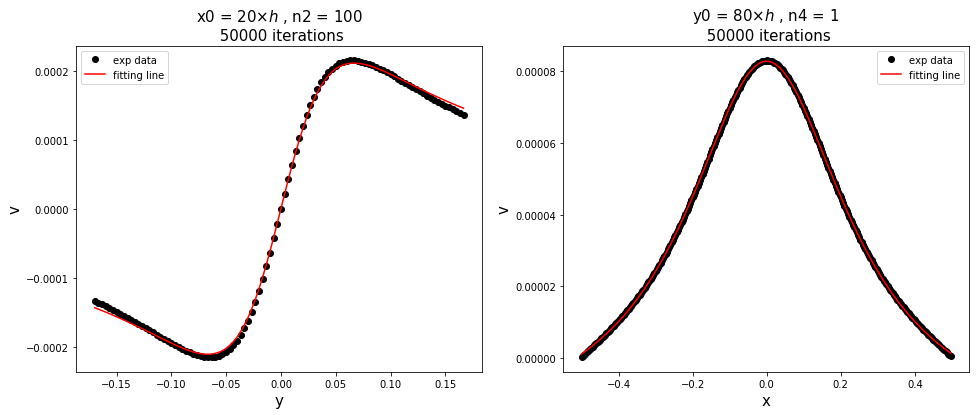

In [7]:
fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()
x0 = h*n1
y0 = h*n3
d = n*h
n2 = 100     # fitting region in x = x0 = n1*h , y = [-(N/2 - n2)*h, (N/2 - n2)*h]
n4 = 1
def func(y,a,c):
    return(c * np.log((x0**2 + (y-d/2)**2)/(x0**2 + (y+d/2)**2)) +a)
def func2(x,a,c):
    return(c * np.log((x**2 + (y0-d/2)**2)/(x**2 + (y0+d/2)**2)) +a)

popt,pcov = curve_fit(func,y[n2-1:-n2],sy1[n2-1:-n2])
# popt, pcov = curve_fit(func, y[n2-1:-n2], sy1[n2-1:-n2], bounds = ([0.99,0.99,0],[1.1,1.1,10]))
a = popt[0]
# b = popt[1]
c = popt[1]
print(a,c)
Vfit = func(y[n2-1:-n2],a,c)

popt,pcov = curve_fit(func2,x[n4-1:-n4],sx1[n4-1:-n4])
# popt, pcov = curve_fit(func, y[n4-1:-n4], sy1[n4-1:-n4], bounds = ([-0.1,0-0.001]))
a2 = popt[0]
# b2 = popt[1]
c2 = popt[1]
print(a2,c2)
Vfit2 = func2(x[n4-1:-n4],a2,c2)


ax[0].plot(y[n2-1:-n2],sy1[n2-1:-n2],'ko',label = 'exp data')
ax[0].plot(y[n2-1:-n2],Vfit,'r',label = 'fitting line')
ax[0].legend()
ax[0].set_title('x0 = ' + str(int(n1)) + r'$\times h$' + ' , n2 = ' + str(int(n2)) + '\n ' + str(int(it)) + ' iterations', fontsize = 15)
ax[0].set_xlabel('y',fontsize = 15)
ax[0].set_ylabel('v',fontsize = 15)

ax[1].plot(x[n4-1:-n4],sx1[n4-1:-n4],'ko',label = 'exp data')
ax[1].plot(x[n4-1:-n4],Vfit2,'r',label = 'fitting line')
ax[1].legend()
ax[1].set_title('y0 = ' + str(int(n3)) + r'$\times h$' + ' , n4 = ' + str(int(n4)) + '\n ' + str(int(it)) + ' iterations' , fontsize = 15)
ax[1].set_xlabel('x',fontsize = 15)
ax[1].set_ylabel('v',fontsize = 15)

(c+c2)/2*4*np.pi*8.85*10**(-12)

## Parallesl sheets of charges


E = -0.01941


(0, 1)

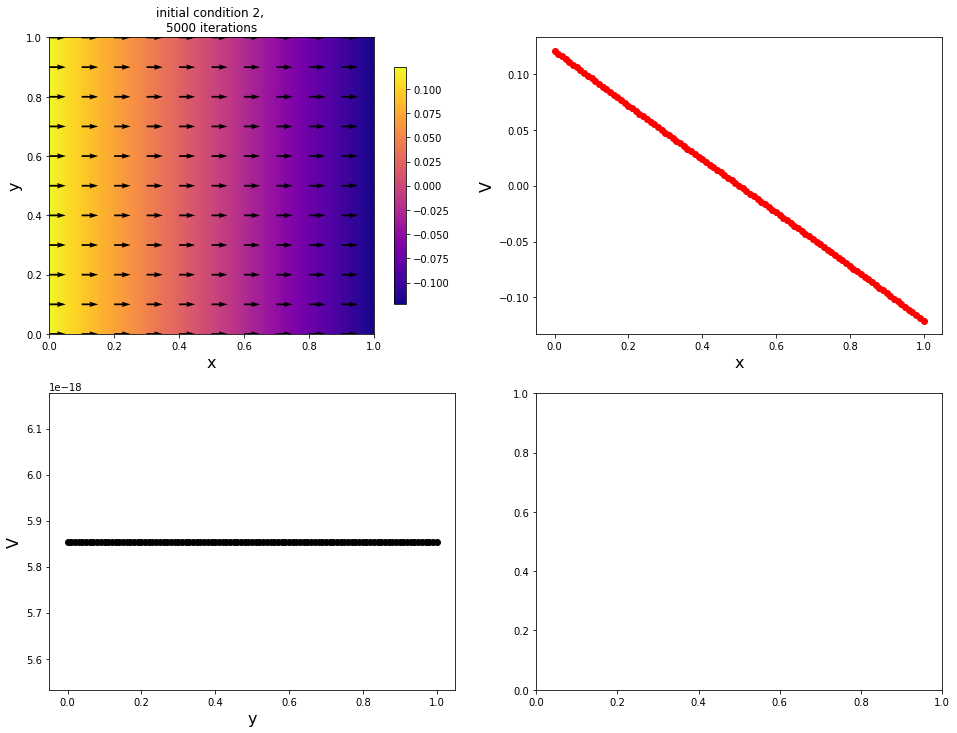

In [8]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 101     # N means the number of equl points
it = 5000
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
A1 = np.zeros((N,N))
A2 = np.zeros((N,N))
A3 = np.zeros((N,N))
A4 = np.zeros((N,N))
ρ = np.zeros((N,N))
ρ[:,0] = 100
ρ[:,N-1] = -100
h = (x[N-1]-x[0])/N
ρρ = np.pi*ρ*h**2
sx = np.zeros_like(x)
sy = np.zeros_like(y)
w = 0

# for Compute the capacitance.
q = sum(ρ[:,0])*h**2
        
for i in range(it):
    A1[1:,:] = V[:-1,:]
    A2[:-1,:] = V[1:,:]
    A3[:,1:] = V[:,:-1]
    A4[:,:-1] = V[:,1:]

    A1[0,:] = V[-1,:]
    A2[-1,:] = V[0,:]

    V = (1+w)/4*(A1 + A2 + A3 + A4) + ρρ - w*V

sy = V[: , int((N-1)/2)]
sx = V[int((N-1)/2) , :]
ax[1].plot(x,sx,'ro')
ax[2].plot(y,sy,'ko-')

contour = ax[0].contourf(X,Y,V,100,cmap='plasma')
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[0])
ax[0].set_title('initial condition ' + str(k%2 +1) + ', \n' + str(it) + ' iterations')

Ey, Ex = np.gradient(-V)
skip=(slice(None,None,10),slice(None,None,10))
ax[0].quiver(X[skip],Y[skip],Ex[skip],Ey[skip],color = 'k')
# ax[0].streamplot(x,y,Ex,Ey,density = 1,color = 'k')
    
print('E = ' + str('%.5f' %fit[0]))
# print('C = ' + str('%.5f' %C))
ax[0].set_xlabel('x',fontsize = 16)
ax[0].set_ylabel('y',fontsize = 16)
ax[1].set_xlabel('x',fontsize = 16)
ax[1].set_ylabel('V',fontsize = 16)
ax[2].set_xlabel('y',fontsize = 16)
ax[2].set_ylabel('V',fontsize = 16)
# ax[3].set_xlabel('iterations',fontsize = 16)
# ax[3].set_ylabel('capacitance',fontsize = 16)
ax[0].set_ylim([0,1])

(-0.1, 0.1)

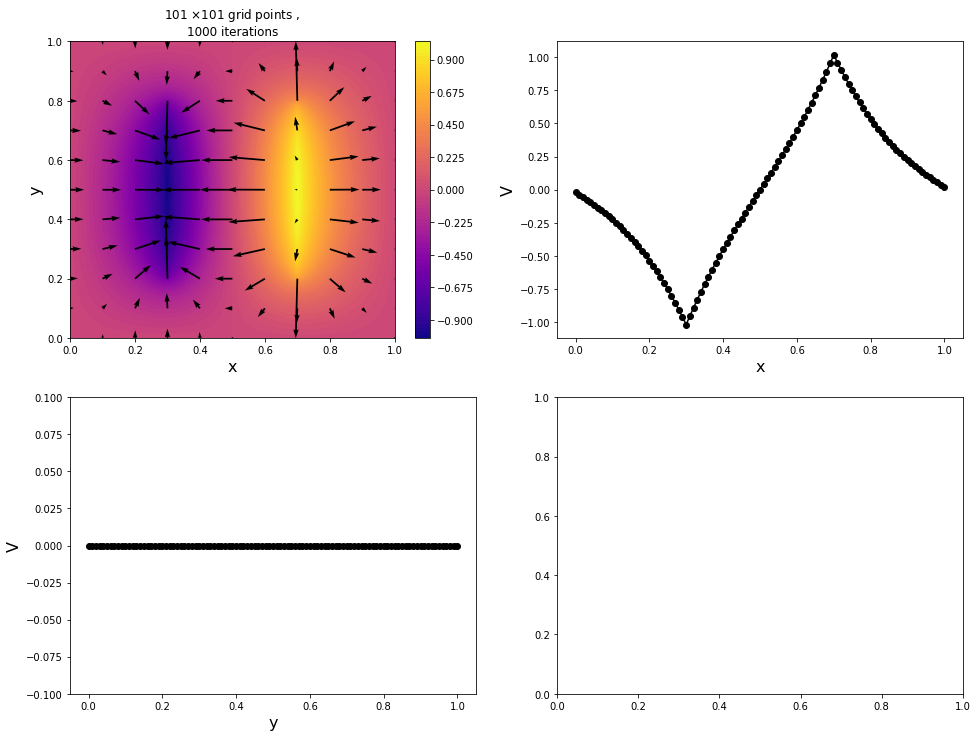

In [45]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 101     # N means the number of equl points
it = 1000
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
A1 = np.zeros((N,N))
A2 = np.zeros((N,N))
A3 = np.zeros((N,N))
A4 = np.zeros((N,N))
w = 1

h = (x[N-1]-x[0])/N
ρ = np.zeros((N,N))
ρ[int((N-1)*0.20):int((N-1)*0.80),int((N-1)*0.7)] = 100
ρ[int((N-1)*0.20):int((N-1)*0.80),int((N-1)*0.3)] = -100
ρρ = np.pi*ρ*h**2

q = sum(ρ[:,int((N-1)*0.7)])*h**2

sx = np.zeros_like(x)
sy = np.zeros_like(y)

for k in range(1):
    if (k%2 == 1):#  another guess
        V[1:N-1][0:N-1] = np.random.random([N-2,N])*50
        
    for i in range(it):
        A1[1:,:] = V[:-1,:]
        A2[:-1,:] = V[1:,:]
        A3[:,1:] = V[:,:-1]
        A4[:,:-1] = V[:,1:]
        
        V = (w)/4*(A1 + A2 + A3 + A4) + ρρ + V*(1-w)
        
        V[:,0] = -V[:,-1]
        V[0,:] = V[-1,:]
        
    sy = V[: , int((N-1)/2)]
    sx = V[int((N-1)/2) , :]
    ax[1].plot(x,sx,'ko-')
    ax[2].plot(y,sy,'ko-')
    
    if (k==0):
        contour = ax[k].contourf(X,Y,V,100,cmap='plasma')
        fig.colorbar(contour, shrink=1, aspect=20,ax=ax[k])
        ax[k].set_title(str(int(N)) + r' $\times $' + str(int(N)) + ' grid points , \n' + str(it) + ' iterations')
        
    Ey, Ex = np.gradient(-V)
    skip=(slice(None,None,10),slice(None,None,10))
    ax[0].quiver(X[skip],Y[skip],Ex[skip],Ey[skip],color = 'k')
#     ax[0].streamplot(x,y,Ex,Ey,density = 1,color = 'k')

ax[0].set_xlabel('x',fontsize = 16)
ax[0].set_ylabel('y',fontsize = 16)
ax[1].set_xlabel('x',fontsize = 16)
ax[1].set_ylabel('V',fontsize = 16)
ax[2].set_xlabel('y',fontsize = 16)
ax[2].set_ylabel('V',fontsize = 16)

ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
ax[2].set_ylim([-0.1,0.1])

## Tasks: Concentric rectangles
Modify your program to solve for $V$between two recrangular boundaries held at constant potential.<br>
Calculate the surface charge density on the boundary surface.<br>
$$
\lambda = \epsilon_0 \vec{n}\cdot \vec{E}
$$
Determine the totla charge on each surface. How do they compare?<br>
Determine the capacitance of the system.

Capacitance = 6.83751


(0, 1)

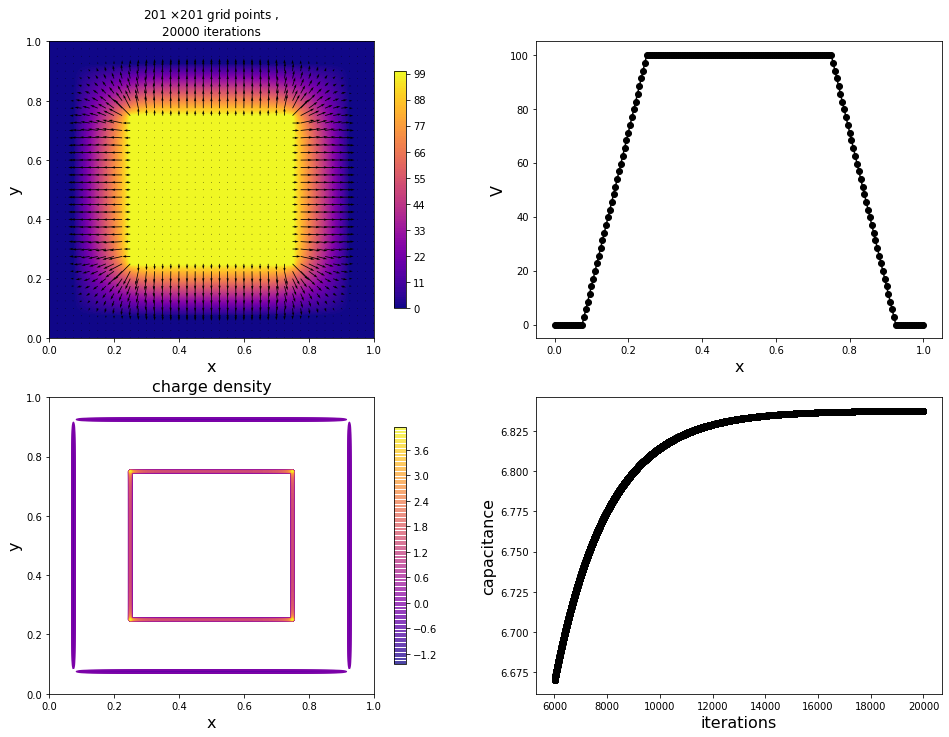

In [58]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 201     # N means the number of equl points
it = 20000
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
A1 = np.zeros((N,N))
A2 = np.zeros((N,N))
A3 = np.zeros((N,N))
A4 = np.zeros((N,N))
h = (x[N-1]-x[0])/N
λ = np.zeros((N,N))
ε0 = 1
w = 0.00

a = 0.5
b = 0.85
a1 = int((N-1)*(0.5-a/2))
a2 = int((N-1)*(0.5+a/2))
b1 = int((N-1)*(0.5-b/2))
b2 = int((N-1)*(0.5+b/2))
V1 = 100
V2 = 0

sx = np.zeros_like(x)
sy = np.zeros_like(y)

V[a1, a1:a2+1] = V1
V[a2, a1:a2+1] = V1
V[a1:a2+1, a1] = V1
V[a1:a2+1, a2] = V1

V[b1, b1:b2+1] = V2
V[b2, b1:b2+1] = V2
V[b1:b2+1, b1] = V2
V[b1:b2+1, b2] = V2
C = np.zeros(it)
# print(b1)
# print(b2)
for k in range(1):
    if (k%2 == 1):#  another guess
        V[1:N-1][0:N-1] = np.random.random([N-2,N])*50
        
    for i in range(it):
        A1[1:,:] = V[:-1,:]
        A2[:-1,:] = V[1:,:]
        A3[:,1:] = V[:,:-1]
        A4[:,:-1] = V[:,1:]
        
        V = 1/4*(A1 + A2 + A3 + A4)
                
        V[a1, a1:a2+1] = V1
        V[a2, a1:a2+1] = V1
        V[a1:a2+1, a1] = V1
        V[a1:a2+1, a2] = V1

        V[b1, b1:b2+1] = V2
        V[b2, b1:b2+1] = V2
        V[b1:b2+1, b1] = V2
        V[b1:b2+1, b2] = V2
        
        if (i>6000):
            Ey, Ex = np.gradient(-V)
            λ[a1,a1+1:a2] = -ε0 * Ey[a1,a1+1:a2]
            λ[a2,a1+1:a2] = ε0 * Ey[a2,a1+1:a2]
            λ[a1+1:a2,a1] = -ε0 * Ex[a1+1:a2,a1]
            λ[a1+1:a2,a2] = ε0 * Ex[a1+1:a2,a2]
            λ[a1,a1] = ε0 * np.sqrt((Ex[a1,a1]**2+Ey[a1,a1]**2))/np.sqrt(2)
            λ[a1,a2] = ε0 * np.sqrt((Ex[a1,a2]**2+Ey[a1,a2]**2))/np.sqrt(2)
            λ[a2,a1] = ε0 * np.sqrt((Ex[a2,a1]**2+Ey[a2,a1]**2))/np.sqrt(2)
            λ[a2,a2] = ε0 * np.sqrt((Ex[a2,a2]**2+Ey[a2,a2]**2))/np.sqrt(2)
            
            λ[b1,b1+1:b2] = ε0 * Ey[b1,b1+1:b2]
            λ[b2,b1+1:b2] = -ε0 * Ey[b2,b1+1:b2]
            λ[b1+1:b2,b1] = ε0 * Ex[b1+1:b2,b1]
            λ[b1+1:b2,b2] = -ε0 * Ex[b1+1:b2,b2]
            λ[b1,b1] = ε0 * np.sqrt((Ex[b1,b1]**2+Ey[b1,b1]**2))/np.sqrt(2)
            λ[b1,b2] = ε0 * np.sqrt((Ex[b1,b2]**2+Ey[b1,b2]**2))/np.sqrt(2)
            λ[b2,b1] = ε0 * np.sqrt((Ex[b2,b1]**2+Ey[b2,b1]**2))/np.sqrt(2)
            λ[b2,b2] = ε0 * np.sqrt((Ex[b2,b2]**2+Ey[b2,b2]**2))/np.sqrt(2)
            
            q1 = sum(λ[a1, a1:a2+1] + λ[a2, a1:a2+1] + λ[a1:a2+1,a1 ] + λ[a1:a2+1, a2])
            q2 = sum(λ[b1, b1:b2+1] + λ[b2, b1:b2+1] + λ[b1:b2+1,b1 ] + λ[b1:b2+1, b2])
            Q = (q1-q2)/2
            C[i] = Q/(V1-V2)
    ax[3].plot(np.linspace(6001,it-1,it-6001),C[6001:],'ko')
            
    charge = ax[2].contour(X,Y,λ,100,cmap='plasma')
    fig.colorbar(charge, shrink=0.8, aspect=20,ax=ax[2])
    sx = V[int((N-1)/2) , :]
    ax[1].plot(x,sx,'ko-')
    
    if (k==0):
        contour = ax[k].contourf(X,Y,V,100,cmap='plasma')
        fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[k])
        ax[k].set_title(str(int(N)) + r' $\times $' + str(int(N)) + ' grid points , \n' + str(it) + ' iterations')
        
    Ey, Ex = np.gradient(-V)
    skip=(slice(None,None,5),slice(None,None,5))
    ax[0].quiver(X[skip],Y[skip],Ex[skip],Ey[skip],color = 'k')
#     ax[0].streamplot(x,y,Ex,Ey,density = 1,color = 'k')

print('Capacitance = ' + str('%.5f' %C[it-1]))
ax[0].set_xlabel('x',fontsize = 16)
ax[0].set_ylabel('y',fontsize = 16)
ax[1].set_xlabel('x',fontsize = 16)
ax[1].set_ylabel('V',fontsize = 16)
ax[2].set_xlabel('x',fontsize = 16)
ax[2].set_ylabel('y',fontsize = 16)
ax[2].set_title('charge density',fontsize = 16)
ax[3].set_xlabel('iterations',fontsize = 16)
ax[3].set_ylabel('capacitance',fontsize = 16)

ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
# ax[2].set_ylim([-0.1,0.1])

<font size = 4>
    In this simple case ,I calculate iteration number v.s. capacitance figure.<br><br>
    From the figure I think C will converge to about $6.84\epsilon_0$ after more iterations.